In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [28]:
train = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')

In [29]:
train.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


In [31]:
train.shape

(750000, 18)

In [32]:
train.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [33]:
train['y'].value_counts()
train['y'].value_counts(normalize=True)


y
0    0.879349
1    0.120651
Name: proportion, dtype: float64

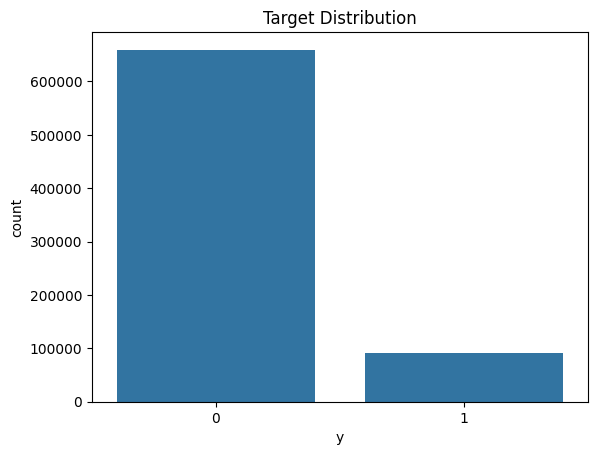

In [34]:
sns.countplot(x='y', data=train)
plt.title("Target Distribution")
plt.show()


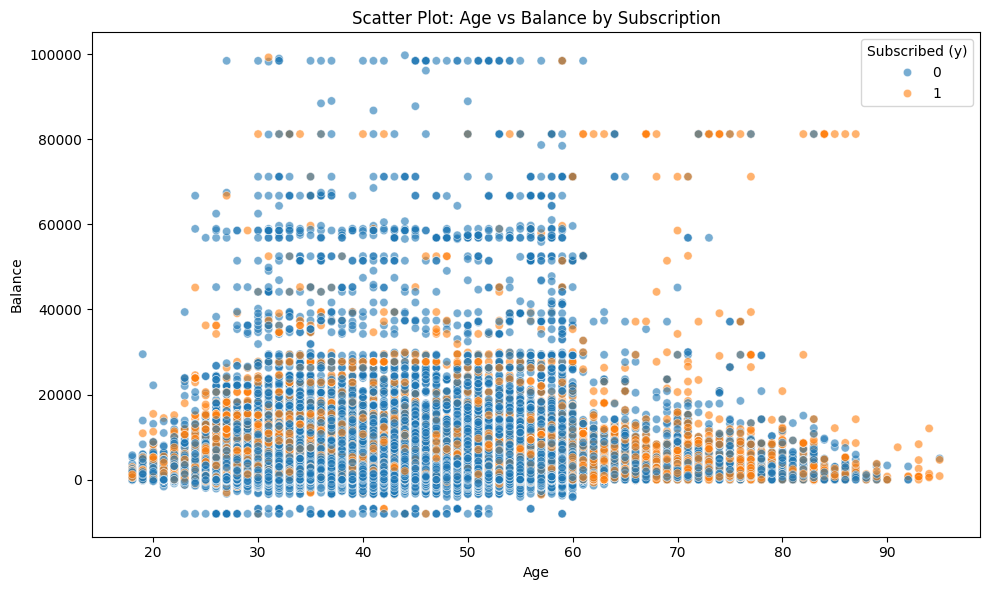

In [35]:


plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=train,
    x='age',
    y='balance',
    hue='y',
    alpha=0.6
)

plt.title("Scatter Plot: Age vs Balance by Subscription")
plt.xlabel("Age")
plt.ylabel("Balance")
plt.legend(title="Subscribed (y)")
plt.tight_layout()
plt.show()


In [36]:
cat_cols = train.select_dtypes(include='object').columns
num_cols = train.select_dtypes(exclude='object').columns

print("Categorical:", cat_cols)
print("------------------------------------------------------------------------------")
print("Numerical:", num_cols)


Categorical: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')
------------------------------------------------------------------------------
Numerical: Index(['id', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'y'],
      dtype='object')


In [37]:
train[num_cols].describe()


,id,age,balance,day,duration,campaign,pdays,previous,y
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,40.926395,1204.067397,16.117209,256.229144,2.577008,22.412733,0.298545,0.120651
std,216506.495284,10.098829,2836.096759,8.250832,272.555662,2.718514,77.319998,1.335926,0.325721
min,0.000000,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,187499.750000,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000,0.000000
50%,374999.500000,39.000000,634.000000,17.000000,133.000000,2.000000,-1.000000,0.000000,0.000000
75%,562499.250000,48.000000,1390.000000,21.000000,361.000000,3.000000,-1.000000,0.000000,0.000000
max,749999.000000,95.000000,99717.000000,31.000000,4918.000000,63.000000,871.000000,200.000000,1.000000


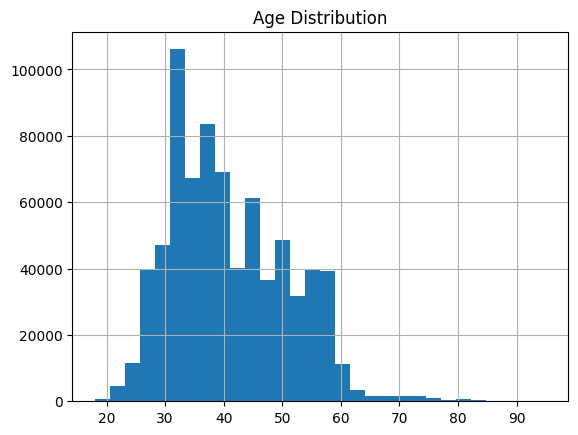

In [38]:
train['age'].hist(bins=30)
plt.title("Age Distribution")
plt.show()


In [39]:
for col in cat_cols:
    print("\n", col)
    print(pd.crosstab(train[col], train['y'], normalize='index'))



 job
y                     0         1
job                              
admin.         0.883547  0.116453
blue-collar    0.932562  0.067438
entrepreneur   0.918614  0.081386
housemaid      0.915347  0.084653
management     0.849608  0.150392
retired        0.753759  0.246241
self-employed  0.870557  0.129443
services       0.917286  0.082714
student        0.659216  0.340784
technician     0.881679  0.118321
unemployed     0.820177  0.179823
unknown        0.879328  0.120672

 marital
y                0         1
marital                     
divorced  0.888424  0.111576
married   0.898128  0.101872
single    0.829547  0.170453

 education
y                 0         1
education                    
primary    0.916903  0.083097
secondary  0.894509  0.105491
tertiary   0.837351  0.162649
unknown    0.866613  0.133387

 default
y               0         1
default                    
no       0.878053  0.121947
yes      0.953693  0.046307

 housing
y               0         1
housing    

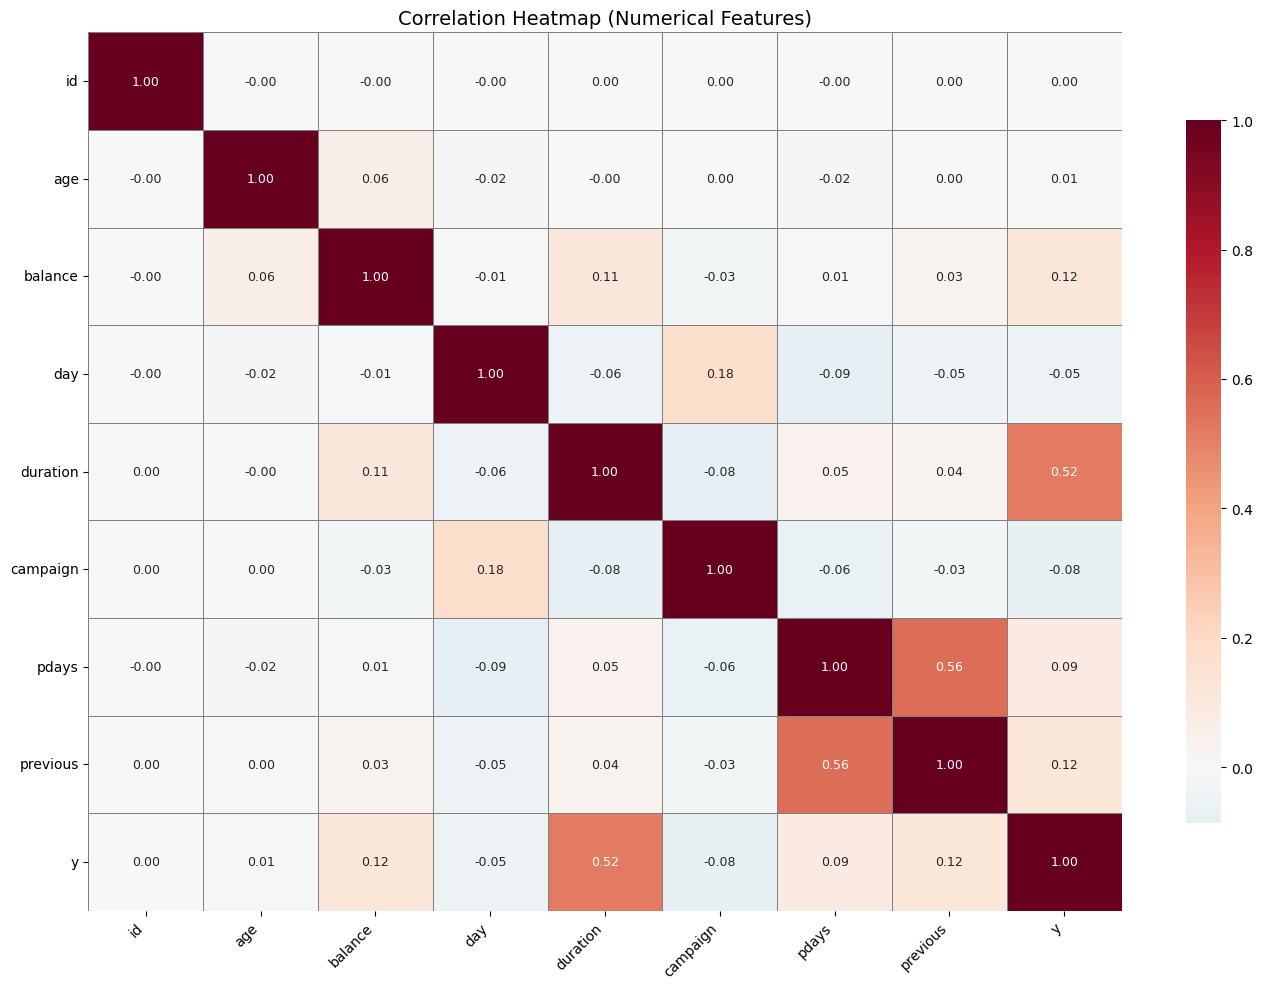

In [40]:
plt.figure(figsize=(14, 10))

sns.heatmap(
    train[num_cols].corr(),
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    center=0,
    linewidths=0.5,
    linecolor="gray",
    annot_kws={"size": 9},
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Heatmap (Numerical Features)", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [41]:
from sklearn.model_selection import train_test_split

X = train.drop('y', axis=1)   
y = train['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
